# Import des outils / jeu de données

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import prince
import seaborn as sns
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
SEED = 0

In [3]:
np.random.seed(SEED)
sns.set_theme()

In [4]:
df = pd.read_csv(
    "data/data-cleaned-feature-engineering.csv",
    sep=",",
    index_col="ID",
    parse_dates=True,
)

## Variables globales

In [5]:
var_numeriques = [
    "Year_Birth",
    "Income",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
]

In [6]:
var_categoriques = [
    "Education",
    "Marital_Status",
    "Kidhome",
    "Teenhome",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
]

var_categoriques_extra = ["NbAcceptedCampaigns", "HasAcceptedCampaigns", "NbChildren"]

var_categoriques_fe = var_categoriques + var_categoriques_extra

# Analyse multi-variée

## Analyse en Composantes Principales (ACP)

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), var_numeriques),
    ],
)

In [8]:
df_centre_reduit = pd.DataFrame(
    preprocessor.fit_transform(df), columns=df[var_numeriques].columns
)

In [9]:
acp = PCA(random_state=SEED)

In [10]:
acp.fit(df_centre_reduit)

PCA(random_state=0)

In [11]:
variance_expliquee = pd.Series(acp.explained_variance_ratio_)

In [12]:
variance_expliquee

0     0.423069
1     0.113425
2     0.077540
3     0.071381
4     0.055963
5     0.046339
6     0.040906
7     0.036656
8     0.032329
9     0.028392
10    0.025331
11    0.019622
12    0.017793
13    0.011253
dtype: float64

<Axes: >

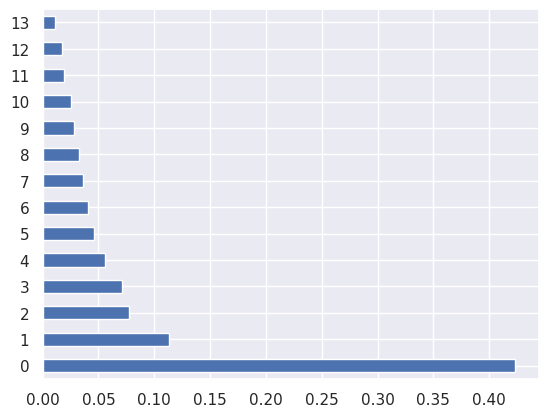

In [13]:
variance_expliquee.plot.barh()

In [14]:
composantes_principales = pd.DataFrame(
    acp.fit_transform(df_centre_reduit),
    index=df.index,
)

In [15]:
composantes_principales.columns = [
    f"ACP{i+1}" for i in range(composantes_principales.shape[1])
]

In [16]:
composantes_principales.head()

ACP1      ACP2      ACP3      ACP4      ACP5      ACP6      ACP7  \
ID                                                                           
5524  3.740047  0.686687  0.736646  0.531819 -1.590652 -0.471516 -0.185397   
2174 -2.032181 -0.603552 -1.382861 -0.595508 -0.826755 -0.107329  0.347291   
4141  1.769018  0.135346 -0.211324 -0.981864 -0.052783  0.148732 -1.094556   
6182 -2.420382 -0.769566  0.959941 -0.628211  0.526074 -0.159783  0.047570   
5324  0.003252  0.532285  0.651654  1.681269  0.491523 -1.145538  0.268150   

          ACP8      ACP9     ACP10     ACP11     ACP12     ACP13     ACP14  
ID                                                                          
5524  2.593604  0.463178  0.424931  0.433451 -0.730740  0.592373  0.089397  
2174  0.147818  0.231462 -0.215216  0.107616 -0.134500 -0.315427 -0.227554  
4141 -0.839666 -0.852866  1.086079  0.690619 -0.041156 -0.072393 -0.119898  
6182 -0.309264 -0.041559  0.139770  0.042381  0.016655  0.134822  0.325988  
5324 -0.513649 -0.097351 -0.208174  0.775859 -0.432117 -0.215142 -0.332748

<Axes: xlabel='ACP3', ylabel='ACP4'>

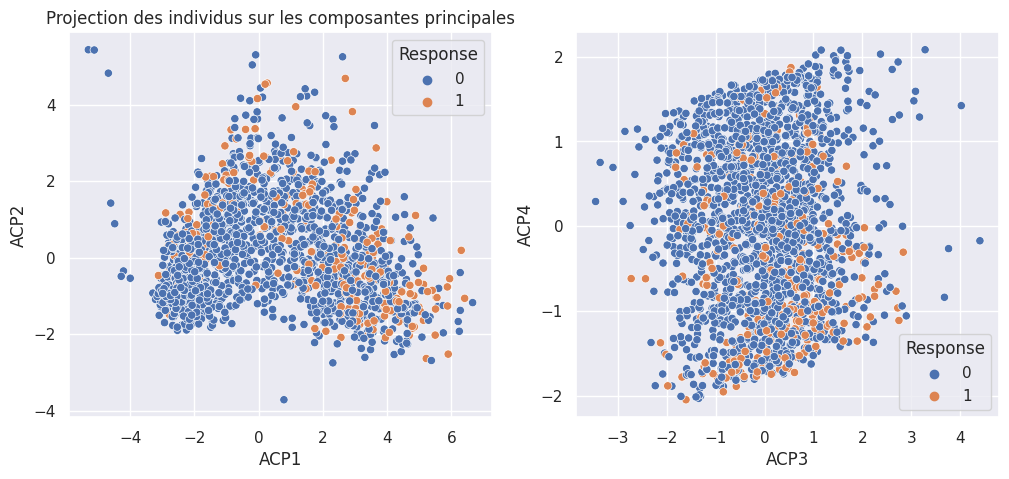

In [17]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].set_title("Projection des individus sur les composantes principales")
sns.scatterplot(
    composantes_principales, x="ACP1", y="ACP2", hue=df["Response"], ax=ax[0]
)
sns.scatterplot(
    composantes_principales, x="ACP3", y="ACP4", hue=df["Response"], ax=ax[1]
)

### Cercle de corrélations

(<Figure size 600x600 with 1 Axes>,
                         Dim 1     Dim 2
 Year_Birth          -0.169398 -0.267281
 Income               0.881444 -0.004026
 Recency              0.011883  0.002613
 MntWines             0.758781  0.284281
 MntFruits            0.710636 -0.181886
 MntMeatProducts      0.808173 -0.179584
 MntFishProducts      0.734842 -0.186836
 MntSweetProducts     0.708950 -0.146427
 MntGoldProds         0.578605  0.230487
 NumDealsPurchases   -0.113542  0.790681
 NumWebPurchases      0.556636  0.597033
 NumCatalogPurchases  0.836085  0.026147
 NumStorePurchases    0.756537  0.221591
 NumWebVisitsMonth   -0.641704  0.479022)

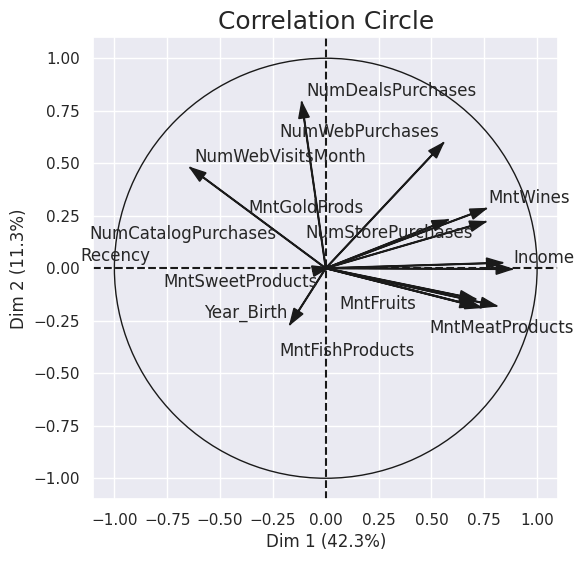

In [18]:
plot_pca_correlation_graph(
    df_centre_reduit,
    df_centre_reduit.columns,
    X_pca=composantes_principales.iloc[:, :2],
    explained_variance=acp.explained_variance_[:2],
    dimensions=(1, 2),
)

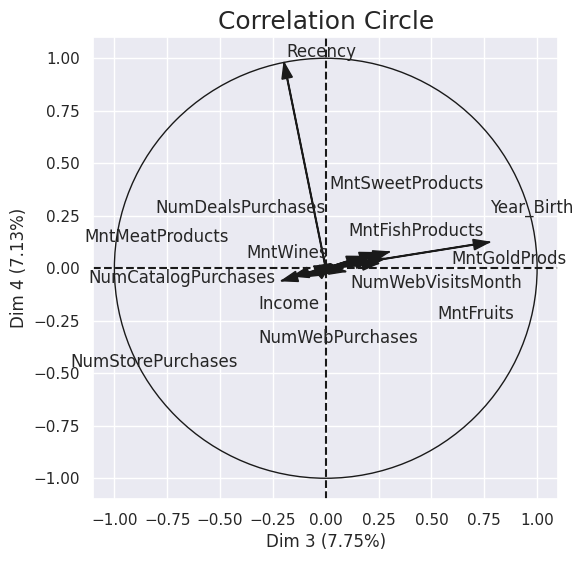

In [19]:
_, correlation_matrix = plot_pca_correlation_graph(
    df_centre_reduit,
    df_centre_reduit.columns,
    X_pca=composantes_principales.iloc[:, :4],
    explained_variance=acp.explained_variance_[:4],
    dimensions=(3, 4),
)

<Axes: >

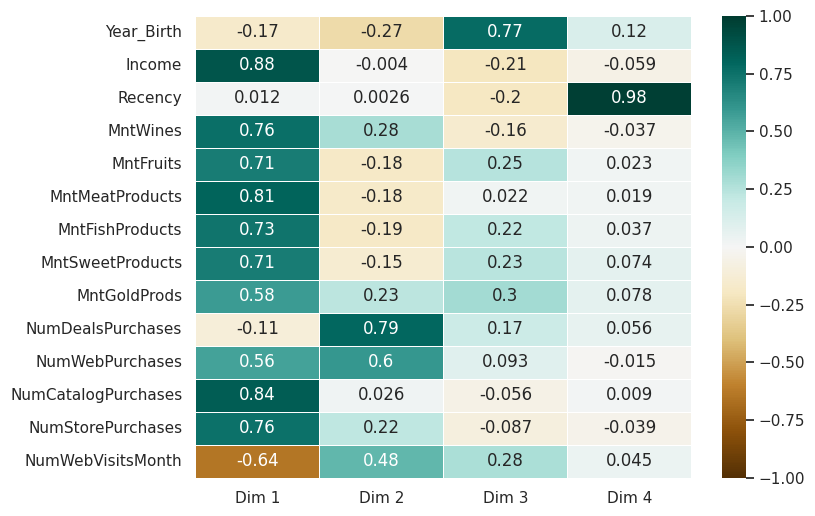

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

**Tableau.** Interprétation des 4 premiers axes de l'ACP

| Axe | Interprétation                                                                                                                                 |
|:----|:-----------------------------------------------------------------------------------------------------------------------------------------------|
| 1   | Richesse (revenu)<br/>Achats dans toutes les catégories<br/>Achats en catalogue et en magasin physique<br/>Peu de visites sur le site Internet |
| 2   | Achats en promotion                                                                                                                            |
| 3   | Année de naissance                                                                                                                             |
| 4   | Nombre de jours depuis le dernier achat (Recency)                                                                                              |

## Analyse Factorielle des Correspondances (AFC)

### Kidhome vs Teenhome

In [21]:
table_contingence = pd.crosstab(df["Kidhome"], df["Teenhome"])

In [22]:
table_contingence

Teenhome    0    1   2
Kidhome               
0         571  576  28
1         463  342  22
2          17   26   0

In [23]:
ca = prince.CA(random_state=SEED)

ca = ca.fit(table_contingence)

In [24]:
ca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.007        96.63%                     96.63%
1              0.000         3.37%                    100.00%

In [25]:
ca.plot(table_contingence)

alt.Chart(...)

### Statut marital et niveau d'éducation

In [26]:
table_contingence = pd.crosstab(df["Marital_Status"], df["Education"])

In [27]:
table_contingence

Education       2n Cycle  Basic  Graduation  Master  PhD
Marital_Status                                          
Divorced              21      1         112      33   47
Married               71     18         396     131  176
Single                37     18         234      69   93
Together              53     11         253      94  106
Widow                  5      1          31      12   22

In [28]:
ca = prince.CA(random_state=SEED)
ca = ca.fit(table_contingence)

In [29]:
ca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.005        60.86%                     60.86%
1              0.002        26.46%                     87.32%

In [30]:
ca.plot(table_contingence)

alt.Chart(...)

In [31]:
# todo: à interpréter

## Analyse des Correspondances Multiples (ACM)

### Variables qualitatives uniquement

In [32]:
df["HasAcceptedCampaigns"] = df["HasAcceptedCampaigns"].astype(int)

In [33]:
mca = prince.MCA(
    n_components=df[var_categoriques_fe].shape[1],
    random_state=SEED,
)
mca = mca.fit(df[var_categoriques_fe])

In [34]:
composantes_acm = mca.row_coordinates(df[var_categoriques_fe])
composantes_acm.columns = [f"ACM{i+1}" for i in range(composantes_acm.shape[1])]

In [35]:
mca.plot(df[var_categoriques_fe])

alt.Chart(...)

**Tableau.** Interprétation des 2 premiers axes de l'ACM

| Axe | Interprétation                                  |
|:----|:------------------------------------------------|
| 1   | Nombre de campagnes acceptées<br/>Peu d'enfants |
| 2   | Niveau d'éducation faible                       |

In [36]:
mca.plot(df[var_categoriques_fe], x_component=2, y_component=3)

alt.Chart(...)

### Avec variables quantitatives en supplémenaire

In [37]:
mca.plot(df[var_categoriques_fe + var_numeriques])

alt.Chart(...)

In [38]:
# todo: à interpréter

### Essai sans Education

In [39]:
mca = prince.MCA(random_state=SEED)
mca = mca.fit(df[var_categoriques_fe].drop(columns=["Education"]))

mca.plot(df[var_categoriques_fe].drop(columns=["Education"]))

alt.Chart(...)

# Sauvegarde des données

In [40]:
composantes_principales.to_csv("data/composantes_acp.csv")
composantes_acm.to_csv("data/composantes_acm.csv")